AlexNet

In [1]:
#Imports
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim import lr_scheduler
import warnings
warnings.filterwarnings("ignore")

Class Counter: 7
Class Names: ['CAT', 'COW', 'DEER', 'FOX', 'HORSE', 'SQUIRREL', 'WOLF']
Device: cuda


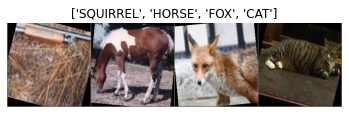

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, visualize_model, losses, accuracy_Scores, f1_Scores, precision_Scores, recall_Scores

In [3]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 100

In [4]:
alexnet = models.alexnet(pretrained=True)
num_ftrs = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_ftrs, CLASS_COUNTER)

alexnet = alexnet.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(alexnet.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Epoch 0/99
----------
[TRAIN] Loss: 0.8292 Acc: 0.7012 F1-Score: 0.1727 Precision: 0.2152 Recall: 0.1757
[VALID] Loss: 0.4317 Acc: 0.8460 F1-Score: 0.2087 Precision: 0.2340 Recall: 0.2115

Epoch 1/99
----------
[TRAIN] Loss: 0.4669 Acc: 0.8269 F1-Score: 0.2069 Precision: 0.2375 Recall: 0.2072
[VALID] Loss: 0.3928 Acc: 0.8680 F1-Score: 0.2160 Precision: 0.2373 Recall: 0.2170

Epoch 2/99
----------
[TRAIN] Loss: 0.4098 Acc: 0.8664 F1-Score: 0.2167 Precision: 0.2412 Recall: 0.2170
[VALID] Loss: 0.3458 Acc: 0.8820 F1-Score: 0.2206 Precision: 0.2408 Recall: 0.2205

Epoch 3/99
----------
[TRAIN] Loss: 0.4036 Acc: 0.8541 F1-Score: 0.2131 Precision: 0.2385 Recall: 0.2140
[VALID] Loss: 0.2903 Acc: 0.9005 F1-Score: 0.2254 Precision: 0.2432 Recall: 0.2251

Epoch 4/99
----------
[TRAIN] Loss: 0.3197 Acc: 0.8954 F1-Score: 0.2241 Precision: 0.2420 Recall: 0.2243
[VALID] Loss: 0.3218 Acc: 0.8944 F1-Score: 0.2245 Precision: 0.2434 Recall: 0.2236

Epoch 5/99
----------
[TRAIN] Loss: 0.3327 Acc: 0.8858 

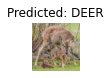

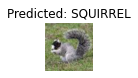

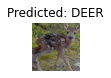

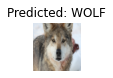

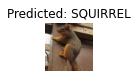

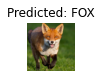

In [5]:
base_model = train_model(alexnet,"alexnet", criterion, optimizer, step_lr_scheduler, num_epochs=NUM_EPOCHS)
visualize_model(base_model)
plt.show()

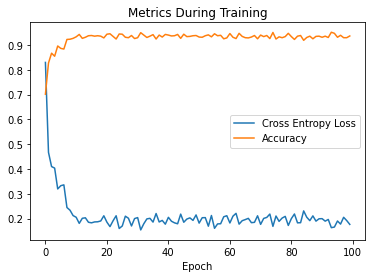

In [6]:
#Plotten
plt.plot(losses, label = "Cross Entropy Loss")
plt.plot(accuracy_Scores, label = "Accuracy")
plt.plot(f1_Scores, label="F1-Score")
plt.grid(color='k', linestyle='-', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend()
plt.title('Metrics During Training');

In [7]:
base_model = test_model(base_model, criterion)

[TEST] Loss: 0.2381 Acc: 0.9071 F1-Score: 0.2296 Precision: 0.2455 Recall: 0.2277
Test complete in 0m 8s
